In [ ]:
run plotly_test_offline.py

In [1]:
import os
from mu2e import mu2e_ext_path
from mu2e.dataframeprod import DataFrameMaker
from mu2e.mu2eplots import mu2e_plot, mu2e_plot3d
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,8)

/usr/local/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning:

The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.

/usr/local/lib/python2.7/site-packages/IPython/utils/traitlets.py:5: UserWarning:

IPython.utils.traitlets has moved to a top-level traitlets package.



<IPython.core.display.Javascript object>

In [2]:
df = DataFrameMaker(mu2e_ext_path+'datafiles/Mau10/Standard_Maps/Mu2e_DSMap',use_pickle = True).data_frame

In [3]:
df_ga04 = DataFrameMaker(mu2e_ext_path+'datafiles/FieldMapsGA04/Mu2e_DS_GA04',use_pickle = True).data_frame

In [2]:
df_ga05 = DataFrameMaker(mu2e_ext_path+'datafiles/FieldMapsGA05/DSMap',use_pickle = True).data_frame

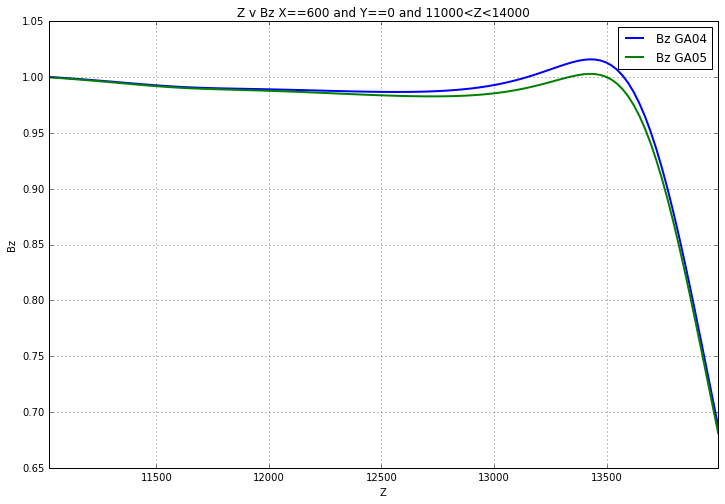

In [35]:
ax = mu2e_plot(df_ga04, 'Z', 'Bz', 'X==600 and Y==0 and 11000<Z<14000', info='GA04', mode='mpl')
mu2e_plot(df_ga05, 'Z', 'Bz', 'X==600 and Y==0 and 11000<Z<14000', info='GA05', mode='mpl',ax=ax)

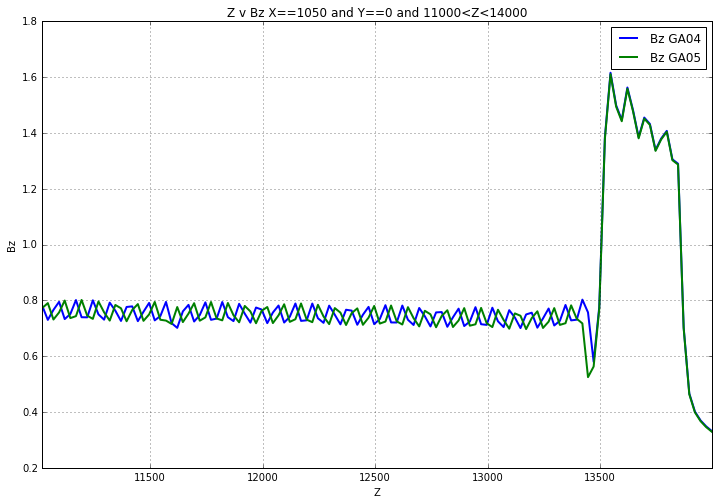

In [61]:
ax = mu2e_plot(df_ga04, 'Z', 'Bz', 'X==1050 and Y==0 and 11000<Z<14000', info='GA04', mode='mpl')
mu2e_plot(df_ga05, 'Z', 'Bz', 'X==1050 and Y==0 and 11000<Z<14000', info='GA05', mode='mpl',ax=ax)

In [ ]:
save_dir = os.path.abspath(os.path.dirname(mu2e.__file__))+'/../source/_plotly'

In [8]:
pi/2

1.5707963267948966

mu2e_plot3d(df_ga04, 'X', 'Z', 'Bz', '950<=X<=1060 and Phi==0 and 13000<Z<14000',
            info='GA04', df_fit=False, mode='plotly_nb', ptype='3d')

In [5]:
mu2e_plot3d(df, 'X', 'Z', 'Bz', '-1000<=X<=1000 and Y==0 and 3000<Z<15000',
            info = 'Mau10', df_fit=False, mode='plotly_nb', ptype='3d')

In [8]:
mu2e_plot3d(df, 'X', 'Z', 'Bx', '-1000<=X<=1000 and Y==0 and 3000<Z<15000',
            info = 'Mau10', df_fit=False, mode='plotly_nb', ptype='3d')

In [ ]:
import mu2e
import pandas as pd
from mu2e.mu2eplots import mu2e_plot3d_ptrap
import cPickle as pkl

In [ ]:
df_nttvd, df_ntpart = pkl.load(open(mu2e.mu2e_ext_path+'datafiles/G4ParticleSim/z13k_muons_GA05.p','rb'))
_, df_xray = pkl.load(open(mu2e.mu2e_ext_path+'datafiles/G4ParticleSim/low_e_ele.p','rb'))
df_ntpart.eval('xstop=xstop+3904')
df_ntpart.eval('x=x+3904')

df_xray.eval('xstop=xstop+3904')

In [ ]:
mu2e_plot3d_ptrap(df_ntpart.query('xstop<1000 and tstop>7000 and sqrt(xstop*xstop+ystop*ystop)<900 and pstop<70').ix[0:80000],'zstop','xstop','ystop',xray=df_xray)
#mu2e_plot3d_ptrap(df_ntpart.ix[0:10000],'z','x','y',xray=df_xray)

In [ ]:
isinstance(df_xray, pd.DataFrame)

In [ ]:
df_xray.query('xstop<1000 and tstop>1000 and sqrt(xstop*xstop+ystop*ystop)<900')

In [ ]:
df_tmp = df_ntpart.query('xstop<1000 and tstop>7000 and sqrt(xstop*xstop+ystop*ystop)<900 and pstop>70')

In [ ]:
df_tmp.pzstop.hist()

In [2]:
import plotly.plotly as py
from plotly.graph_objs import *
from plotly.widgets import GraphWidget
from IPython.display import display, HTML, Image
import numpy as np
import math
from IPython.html import widgets


In [3]:
z = np.arange(1,20,0.1)
x = np.cos(4*z)*( np.power(z+1,3) )
y = np.sin(4*z)*( np.power(z+1,3) )

In [5]:
class shifter:
    def __init__(self):
        self.x = np.cos(4*z)*( np.power(z+1,3) )
        self.y = np.sin(4*z)*( np.power(z+1,3) )
        
    
    def on_phase_change(self, name, old_value, new_value):
        self.x = np.cos(4*z+new_value)*( np.power(z+1,3) )
        self.y = np.sin(4*z+new_value)*( np.power(z+1,3) )
        self.replot()
        
    def replot(self):
        g.restyle({ 'x': [self.x], 'y': [self.y] })

p_slider = widgets.FloatSlider(min=0,max=10,value=1,step=0.05)
p_slider.description = 'Phase shift'
p_slider.value = 1

p_state = shifter()
p_slider.on_trait_change(p_state.on_phase_change, 'value')

In [6]:
g = GraphWidget()
g.restyle( { 'x':[x],
            'y':[y],
            'z':[z], 
            'marker':{'size':np.power(z,1.2),'opacity':0.9,'color':'blue'},             
            'type':'scatter3d' } )

In [7]:
display(p_slider)
display(g)